In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
data = pd.read_csv('C:/AI_study/titanic.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df_features = data.columns
df_features = data.columns.drop('Survived')
df_features

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df_data = pd.DataFrame(data[df_features])
df_target = pd.DataFrame(data['Survived'], columns=['Survived'])

In [5]:
import tensorflow as tf
from tensorflow import keras

In [9]:
# 결측치 확인
missing_value = data.isnull().sum()
print(missing_value)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
# 평균값 계산
mean_values = data.mean()

# 결측치 대체
data_filled = data.fillna(mean_values)

In [12]:
# 결과 출력
print("원본 데이터프레임:")
print(data)
print("\n결측치가 평균으로 대체된 데이터프레임:")
print(data_filled)

원본 데이터프레임:
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...    

In [14]:
data_filled.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
# 결측치가 있는 행을 제거한 새로운 DataFrame 생성
df_without_missing_values = data_filled.dropna()

# 새로운 DataFrame 출력
print(df_without_missing_values)

# 결측치가 있는 행을 제거하여 원본 DataFrame을 수정
data_filled.dropna(inplace=True)

# 수정된 DataFrame 출력
print(data_filled)

     PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
10            11         1       3   
11            12         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
..                                                 ...     ...   ... 

In [29]:
data = data_filled

In [30]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  202 non-null    int64  
 1   Survived     202 non-null    int64  
 2   Pclass       202 non-null    int64  
 3   Name         202 non-null    object 
 4   Sex          202 non-null    object 
 5   Age          202 non-null    float64
 6   SibSp        202 non-null    int64  
 7   Parch        202 non-null    int64  
 8   Ticket       202 non-null    object 
 9   Fare         202 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     202 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 20.5+ KB


In [32]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
data['Name'] = label.fit_transform(data['Name'])
data['Sex'] = label.fit_transform(data['Sex'])
data['Ticket'] = label.fit_transform(data['Ticket'])
data['Cabin'] = label.fit_transform(data['Cabin'])
data['Embarked'] = label.fit_transform(data['Embarked'])

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  202 non-null    int64  
 1   Survived     202 non-null    int64  
 2   Pclass       202 non-null    int64  
 3   Name         202 non-null    int32  
 4   Sex          202 non-null    int32  
 5   Age          202 non-null    float64
 6   SibSp        202 non-null    int64  
 7   Parch        202 non-null    int64  
 8   Ticket       202 non-null    int32  
 9   Fare         202 non-null    float64
 10  Cabin        202 non-null    int32  
 11  Embarked     202 non-null    int32  
dtypes: float64(2), int32(5), int64(5)
memory usage: 16.6 KB


In [34]:
data.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,455.495050,0.663366,1.198020,100.500000,0.529703,35.112392,0.445545,0.440594,70.386139,76.103301,75.663366,1.297030
std,249.704228,0.473732,0.528205,58.456537,0.500357,14.988475,0.630490,0.732294,40.506979,74.759941,41.898308,0.946789
min,2.000000,0.000000,1.000000,0.000000,0.000000,0.920000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,263.250000,0.000000,1.000000,50.250000,0.000000,25.000000,0.000000,0.000000,36.250000,28.959375,40.250000,0.000000
50%,457.500000,1.000000,1.000000,100.500000,1.000000,33.500000,0.000000,0.000000,71.500000,55.000000,74.500000,2.000000
75%,681.500000,1.000000,1.000000,150.750000,1.000000,46.750000,1.000000,1.000000,105.750000,89.776050,112.750000,2.000000
max,890.000000,1.000000,3.000000,201.000000,1.000000,80.000000,3.000000,4.000000,140.000000,512.329200,145.000000,2.000000


In [35]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,51,0,38.0,1,0,123,71.2833,80,0
3,4,1,1,74,0,35.0,1,0,36,53.1000,54,2
6,7,0,1,122,1,54.0,0,0,62,51.8625,128,2
10,11,1,3,161,0,4.0,1,1,134,16.7000,144,2
11,12,1,1,27,0,58.0,0,0,31,26.5500,48,2
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,18,0,47.0,1,1,38,52.5542,101,2
872,873,0,1,35,1,33.0,0,0,102,5.0000,33,2
879,880,1,1,151,0,56.0,0,1,43,83.1583,69,0
887,888,1,1,80,0,19.0,0,0,10,30.0000,29,2


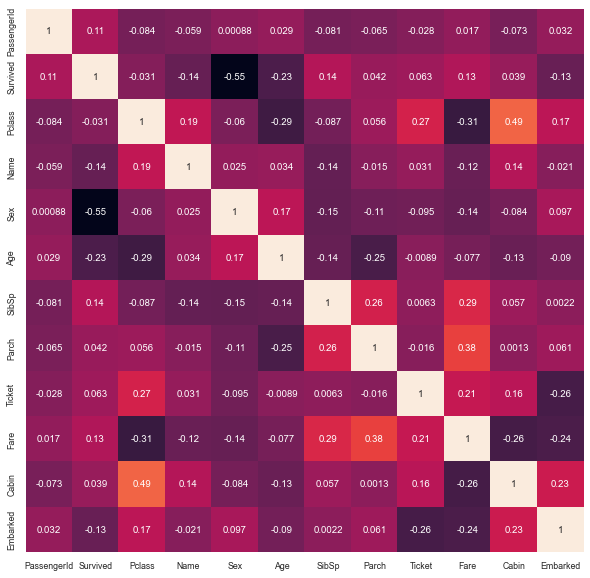

In [36]:
#상관 관계 행렬
df_corr=data.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [37]:
X=data.drop('Survived',axis=1)
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,51,0,38.0,1,0,123,71.2833,80,0
3,4,1,74,0,35.0,1,0,36,53.1000,54,2
6,7,1,122,1,54.0,0,0,62,51.8625,128,2
10,11,3,161,0,4.0,1,1,134,16.7000,144,2
11,12,1,27,0,58.0,0,0,31,26.5500,48,2
...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,18,0,47.0,1,1,38,52.5542,101,2
872,873,1,35,1,33.0,0,0,102,5.0000,33,2
879,880,1,151,0,56.0,0,1,43,83.1583,69,0
887,888,1,80,0,19.0,0,0,10,30.0000,29,2


In [38]:
y=data['Survived']
y.value_counts()

1    134
0     68
Name: Survived, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)

print(rf_clf.predict([[3, 1, 1, 0, 30, 0, 0, 120, 70,80, 0 ]]))
print(rf_clf.predict([[3, 1, 1, 1, 30, 0, 0, 120, 70,80, 0 ]]))


--- Radom Forest ---
[1]
[0]
